In [1]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

import pandas as pd
import numpy as np

data_handle = 'cond1_pat59to74'
pca_mode = 'pca'

inter_dir = '../../data/intermediates'
data_subdir = data_handle + '_' + pca_mode
data_dir = inter_dir + '/' + data_subdir

fX_test = data_dir + '/X_test_' + data_handle + '.csv'
fX_train = data_dir + '/X_train_' + data_handle + '.csv'
fy_test = data_dir + '/y_test_' + data_handle + '.csv'
fy_train = data_dir + '/y_train_' + data_handle + '.csv'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
X_test = np.loadtxt(fX_test, delimiter=',')
X_train = np.loadtxt(fX_train, delimiter=',')
y_test = pd.read_csv(fy_test)
y_train = pd.read_csv(fy_train)

print('---- X_test ----')
print(X_test, '\n')
print('---- X_train ----')
print(X_train, '\n')
print('---- y_test ----')
display(y_test)
print('---- y_train ----')
display(y_train)

---- X_test ----
[[ 45.48202494  11.0863002    4.3385475    4.46947708   8.41306283
   -4.4792895  -21.1527582   -8.1940768   17.62945736  16.19057092
    5.67759171   1.65397124]
 [-10.44407942  13.74575911  25.40583899   2.22530492  -0.61851318
  -32.35498332 -34.28342212 -18.92507985  -5.57833502  12.47843037
   -7.44882927  -0.12866558]
 [  1.96015371  -5.53222481  -4.32420502  21.49414431 -10.94966914
  -18.56150708   8.79556053  -4.32026154  -1.99122461  -5.83354336
   11.59752294  -0.98851253]
 [-19.56363165 -32.77816107  -9.78815884   5.7207305   -0.52390239
   -6.11856071  35.19123429 -28.37385399 -29.73063117 -24.7131694
   33.25374351  -1.70600856]] 

---- X_train ----
[[ 1.25096082e+02 -1.30798457e+02 -2.32396614e+01 -1.19837264e+02
  -1.04418096e+02 -6.79189844e+01 -2.02010481e+01  1.08066814e+01
   8.27643794e+00  5.33098820e+00  1.09187215e+01  1.32876693e-13]
 [-1.44514349e+01  1.10392305e+01 -5.40262956e+01 -6.31210471e+01
   2.37073371e+01  1.45851552e+02 -1.08783697e

,subject,class
0,60,0
1,65,0
2,67,1
3,68,1


---- y_train ----


,subject,class
0,72,1
1,63,0
2,61,0
3,73,1
4,69,1
5,66,0
6,74,1
7,70,1
8,62,0
9,59,0


In [4]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train['class'])

CPU times: user 904 ms, sys: 188 ms, total: 1.09 s
Wall time: 1.21 s


RandomForestClassifier()

In [5]:
y_pred = rf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test['class'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [7]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(1,500), 'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search.fit(X_train, y_train['class'])

CPU times: user 8.22 s, sys: 34.8 ms, total: 8.25 s
Wall time: 8.26 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11edcf610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11eda8ac0>})

In [8]:
best_est = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 230}


In [9]:
%%time
rf_best = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'])
# rf_best = RandomForestClassifier(max_depth=100, n_estimators=4)  # inconsistent results upon repeat
rf_best.fit(X_train, y_train['class'])
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test['class'], y_pred_best)
print("Best accuracy:", accuracy_best)

Best accuracy: 0.75
CPU times: user 378 ms, sys: 5.91 ms, total: 384 ms
Wall time: 384 ms


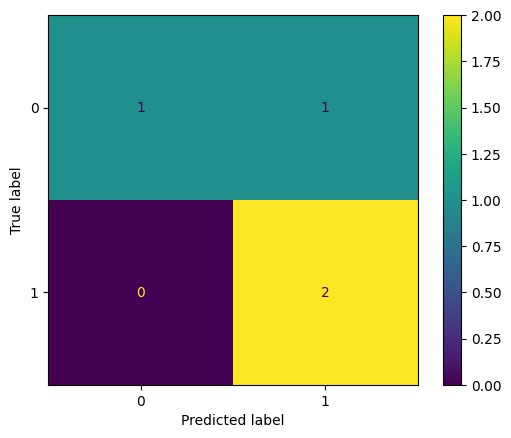

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test['class'], y_pred_best)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
# F- I-- N---